In [24]:
!jupyter nbextension enable splitcell/splitcell
!jupyter nbextension enable rise/main

Enabling notebook extension splitcell/splitcell...
      - Validating: OK
Enabling notebook extension rise/main...
      - Validating: OK


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib import colors, cm

import os
import pandas as pd
from tensorflow import keras

In [2]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'figure.figsize': (12,9)})
plt.rcParams['lines.markersize'] = 8

# IML Workshop Tutorial

### Introduction to the Basics of Deep Learning

# Introduction

This first session is an introduction to neural networks and deep learning
  * Neural network basics
  * Training and generalization
  * Fully connected and convolutional architectures
  * Physics!

This is a tutorial, not a talk. Feel free to ask questions throughout!

# Setup for Tutorial

You can follow along locally or use Swan/Binder:

* Go to https://github.com/3pia/iml2019

* Suggested: Click `Open in SWAN`

 $\qquad \rightarrow$ Choose `95a Python3` as software stack

![](images/introduction/github_page.png)

# Machine Learning

## In Physics

TODO

# Tensorflow and Keras

Many different frameworks for deep learning, steered mostly from Python

Two most popular:
* Tensorflow ( + higher level abstractions with Keras)
* Pytorch


![](images/introduction/dl_popularity.png)
https://towardsdatascience.com/deep-learning-framework-power-scores-2018-23607ddf297a

In this tutorial, we will use TensorFlow + Keras

Side note: Many changes coming with TensorFlow 2.0. Some glimpses into the future later today

# Training by Example

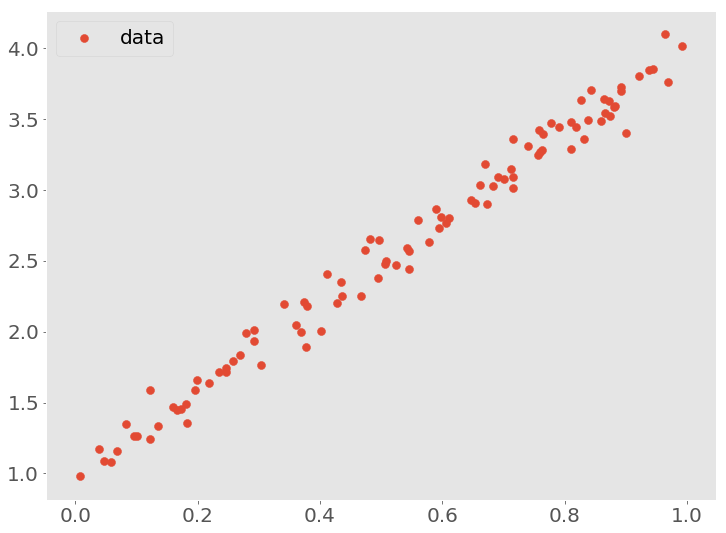

In [3]:
data = np.random.uniform(size=100)
labels = 3*data + 1 + np.random.normal(loc=0.0, scale=0.1, size=100)

plt.scatter(data, labels, label="data")
plt.legend()
plt.show()

Data: {x<sub>i</sub>, y<sub>i</sub>}, i = 1...N

Define model $y_{m}(x, \theta) = Wx + b$ with free parameters $\theta = (W, b)$

Define *objective function (loss/cost)*
\begin{equation}
J(\theta|x,y) = \frac{1}{N} \sum_{i}^{N} [y_{i}-y_{m}(x_{i}, \theta)]^{2}
\end{equation}

Minimze objective ("train model")
\begin{equation}
\hat{\theta} = argmin[J(\theta)]
\end{equation}

Easy to do if we have only a few variables

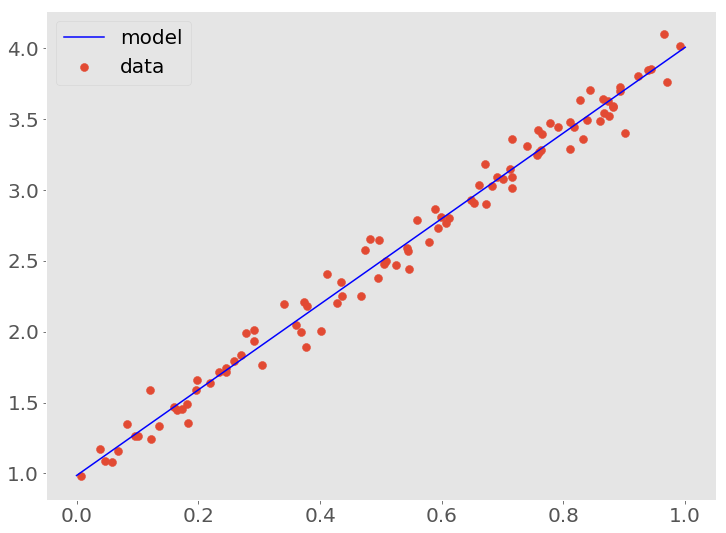

In [4]:
def cost(params):
    W, b = params
    return np.mean((labels - (W*data + b))**2)

from scipy.optimize import minimize
res = minimize(cost, [1., 1.])
W, b = res.x

points = np.linspace(0, 1, 100)
prediction = W*points + b

plt.scatter(data, labels, label="data")
plt.plot(points, prediction, label="model", color="blue")
plt.legend()
plt.show()

# Multidimensional Linear Models

Now, consider multiple inputs $x = (x_{1}, .., x_{n})$ and outputs $y = (y_{1}, ..., y_{m})$

Example: $x \in \mathbb{R}^{3}$, $y \in \mathbb{R}^{2}$

\begin{gather}
\begin{bmatrix} W_{11} & W_{12} & W_{13} \\
 W_{21} & W_{22} & W_{23} \end{bmatrix} x \begin{pmatrix} x_{1} \\ x_{2} \\ x_{3} \end{pmatrix} + \begin{pmatrix} b_{1} \\ b_{2} \end{pmatrix} = \begin{pmatrix} y_{1} \\ y_{2} \end{pmatrix}
 \end{gather}

![](images/introduction/linear_model.png)

# Neural Networks

So far we can only describe linear models
  
$\quad \rightarrow$ Compose model with multiple layers

\begin{align}
& h = W^{(1)}x + b^{(1)} \\
& y = W^{(2)}h + b^{(2)}
\end{align}

Model ist still linear

\begin{align}
& y = W^{(2)}(W^{(1)}x + b^{(1)}) + b^{(2)} \\
& y = W^{(2)}W^{(1)}x + W^{(2)}b^{(1)} + b^{(1)}
\end{align}

$\quad \rightarrow$ Apply non-linear *activation function* $\sigma(x)$

![](images/introduction/simple_nn.png)

# Activation Functions

Applied elementwise to each node in a hidden layer

Introduces non-linearity

$\quad \rightarrow$ Allows stacking of multiple layers

![](images/introduction/activations.png)

Mostly ReLU variants used in deep learning due to *vanishing gradient problem*

# Deep Neural Networks

![](images/introduction/deepnetwork.png)

Hierarchical feature extraction: Higher level of abstraction with each layer

$\quad \rightarrow$ Enables training on lower-level/"raw" data

# Classification vs Regression

### Regression

Predict continous label

### Classification

Separate events into multiple categories

![](images/introduction/regression.png)

![](images/introduction/classification.png)

Minimize *mean squared error*

\begin{equation}
J(\theta|x,y) = \frac{1}{N} \sum_{i}^{N} [y_{i}-y_{m}(x_{i}, \theta)]^{2}
\end{equation}

Minimize *cross entropy*

\begin{equation}
J(\theta|x,y) = - \frac{1}{N} \sum_{i}^{N} y_{i}log[y_{m}(x_{i}, \theta)]
\end{equation}

with softmax activation to constrain outputs to (0, 1) and their sum to 1 ("probability like")

\begin{equation}
y_{j}(z) = \frac{e^{z_{j}}}{\sum_{i}e^{z_{i}}}
\end{equation}

# Backpropagation and Gradient Descent

Can no longer directly minimize objective function. Instead, minimze iteratively by updating $\theta$ in opposite direction of gradient

\begin{equation}
\hat{\theta} \rightarrow \theta - \alpha\frac{dJ}{d\theta}
\end{equation}

with learning rate $\alpha$

Derivative can be calculated using the chain rule

\begin{equation}
\frac{dJ}{d\theta} = \frac{dJ}{d\y_{i}}\frac{TODO}{TODO}
\end{equation}

# Stochastic Gradient Descent

Evaluation and derivation of the objective function for the full dataset costly.

<br>

Instead, calculate gradient for a a small subset (*batch*) of the training data

$\rightarrow$ Stochastic updates also help avoid local minima 

<br>

One iteration over the full dataset called an *epoch*

![](images/introduction/gradientupdate.png)

# Optimizers

More advanced options than fixed learning rate 

* Momentum: Use past gradients as "velocity"

<br>

* Adaptive methods: Learning rates based on past gradients, separate for all parameters

$\qquad \rightarrow$ E.g. Adagrad, Adadelta, Adam

![](images/introduction/optimizers.gif)
http://ruder.io/optimizing-gradient-descent/

# Initialization

Neural network parameters initialized randomly

$\quad \rightarrow$ Break symmetry

Suitable values depend on layer sizes and activation functions

$\quad \rightarrow$ Basic idea: $Var[output] = Var[input]$

Glorot (sigmoid)

\begin{equation}
Var[W] = \frac{2}{N_{in} + N_{out}}
\end{equation}

He (ReLU)

\begin{equation}
Var[W] = \frac{2}{N_{in}}
\end{equation}

Values typically sampled from normal or uniform (additional factor of 3) distribution

# Preprocessing

Input features can have vastly different scales (e.g. $p_{T}$ vs $\eta$)

Most basic strategy: Normalize to mean 0 and variance 1

![](images/introduction/preprocessing.jpeg)
http://cs231n.github.io

Other options possible, e.g. input decorrelation, non-linear transformations

# Let's Try it Out

For now we use base tensorflow to see all steps.
Later we will use higher level abstractions provided in `tf.keras`

First, let's generate some toy data:

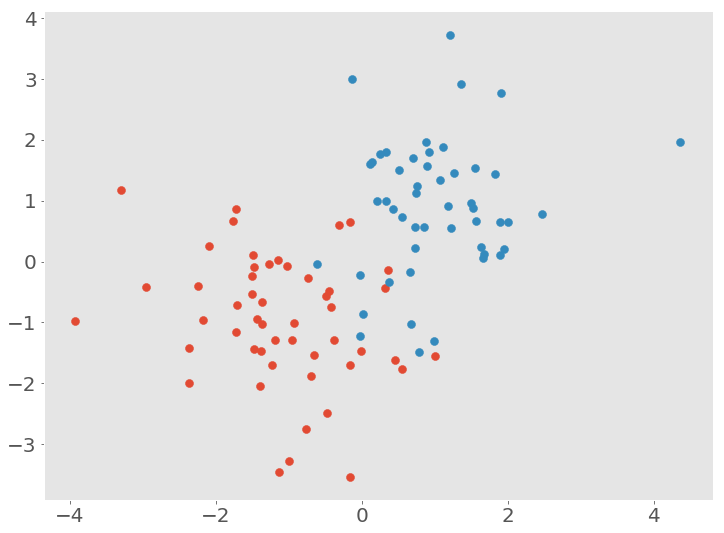

In [5]:
n_samples = 50

class1_data = np.random.multivariate_normal([-1., -1.], [[1., 0.], [0., 1.]], n_samples)
class2_data = np.random.multivariate_normal([1., 1.], [[1., 0.], [0., 1.]], n_samples)

train_data = np.concatenate([class1_data, class2_data])
labels = np.zeros(train_data.shape)
labels[:n_samples, 0] = 1
labels[n_samples:, 1] = 1

plt.scatter(*class1_data.T)
plt.scatter(*class2_data.T)
plt.show()

Tensorflow provides datasets and iterators to work with our data. Our model works with an iterator batch, which will be dynamically loaded during training

In [6]:
tf.reset_default_graph()

inp_placeholder = tf.placeholder(dtype=tf.float32, shape=[None, 2])
target_placeholder = tf.placeholder(dtype=tf.float32, shape=[None, 2])

dataset = tf.data.Dataset.from_tensor_slices((inp_placeholder, target_placeholder)).batch(10).shuffle(buffer_size=n_samples)
iterator = dataset.make_initializable_iterator()
inp, target = iterator.get_next()

Instructions for updating:
Colocations handled automatically by placer.


We define a simple model with one hidden layer, using the initialization rules we saw before

Since this is a classification task, we use cross entropy as our objective function

In [7]:
n_hidden = 10
n_epochs = 1000

with tf.variable_scope("initialization", reuse=tf.AUTO_REUSE):
    W1 = tf.get_variable("W1", initializer=tf.random.normal((2, n_hidden), stddev=1.))
    b1 = tf.get_variable("b1", initializer=tf.constant(0., shape=(n_hidden,)))
    hidden = tf.nn.relu(tf.add(tf.matmul(inp, W1), b1))

    W2 = tf.get_variable("W2", initializer=tf.random.normal((n_hidden, 2), stddev=(2./n_hidden)**0.5))
    b2 = tf.get_variable("b2", initializer=tf.constant(0., shape=(2,)))
    out = tf.nn.softmax(tf.add(tf.matmul(hidden, W2), b2))
    
cost = -tf.reduce_mean(tf.reduce_sum(target*tf.log(tf.clip_by_value(out,1e-10,1.0)), reduction_indices=1))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In our training loop, we iterate over all batches in our training data, then re-initialize the iterator and repeat this for N *epochs*

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(n_epochs):
        sess.run(iterator.initializer, feed_dict={inp_placeholder: train_data,
                                      target_placeholder: labels})
        while True:
            try:
                sess.run(train_step)
            except tf.errors.OutOfRangeError:
                break

    x = y = np.linspace(-3, 3, 41)
    z = np.array([sess.run(out, feed_dict={inp: [[j, i]]})[0, 0] for i in x for j in y])
Z = z.reshape(41, 41)

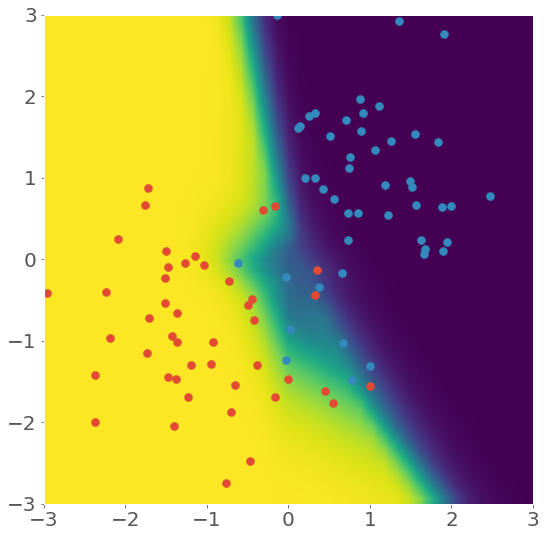

In [9]:
plt.scatter(*class1_data.T)
plt.scatter(*class2_data.T)
plt.imshow(Z, interpolation="bilinear", origin="lower", extent=(-3, 3, -3., 3.))
plt.show()

# Overtraining and Generalization

* If modeling capacity too low or training insufficient $\rightarrow$ Bad performance

<br>

* If modeling capacity high, network can learn to memorize training samples $\rightarrow$ Bad generalization  (*Overtraining*)

![](images/introduction/overtraining.png)

Solution 1: Evaluate performance on a statistically independent *validation set* to measure generalization capabilities 

$\quad \rightarrow$ Stop training when performance on validation set decreases: *Early stopping*

![](images/introduction/earlystopping.png)

**Caution:** Optimization of network hyperparameters itself a form of training

$\quad \rightarrow$ Validation set not unbiased

Use a third *test set* to measure final performance *once*

In physics: Validation set is sometimes called test set, test set is called evaluation set

# Regularization

Methods to suppress overtraining

* Already mentioned: Early stopping

* L2 regularization: Penalize high weights

\begin{equation}
J = J_{0} + \lambda \sum W_{i}^{2}
\end{equation}

with scaling factor $\lambda$

# Dropout

Randomly drop a percentage of nodes at each training step

Learn redundant representations $\rightarrow$ More robust model

Can be seen as training an ensemble of losely coupled networks in parallel

For evaluation: Disable dropout, scale node outputs accordingly

![](images/introduction/dropout.png)
[Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://jmlr.org/papers/v15/srivastava14a.html)

# Convolutional Neural Networks

So far, considered only fully connected neural networks

Convolutional neural networks (CNN): Applied to images.

Exploits local correlations and translational invariance

![](images/introduction/translational_invar.png)
[Udacity Course Deep Learning](https://in.udacity.com/course/deep-learning--ud730-india)

# Convolutions

todo: add activation in image

![](images/introduction/convolution_1.png)

# Feature Detection

# Stacking

# Feature Hierarchy

![](images/introduction/featuremaps.png)
[Zeiler & Fergus 2013](https://arxiv.org/abs/1311.2901), adapted by Yann leCun

# Padding and Pooling

Multiple convolutional layers will decrease output size due to edge effects

$\quad \rightarrow$ Can pad with zeros to keep dimensions the same

![](images/introduction/padding.png)

On the other hand, can pool outputs together when output size reduction is desired

E.g. max pooling: Take the maximum of each patch 

![](images/introduction/cnn_maxpool.png)

# CNN Structure

Convolutional Pyramid

# CNN Example - Top Tagging

Problem statement: Hadronically decaying top quark, boosted so that all decay products are contained in one fat jet

$\quad \rightarrow$ Distinguish from QCD jets


![](images/introduction/boosted_top.png)

[Open dataset](https://desycloud.desy.de/index.php/s/llbX3zpLhazgPJ6) ([citation](https://arxiv.org/abs/1707.08966)), with comparison of various machine learning methods [here](https://arxiv.org/abs/1902.09914)

One approach: Image based using CNNs

Simplified model here based on [Deep-learning Top Taggers or The End of QCD?](https://arxiv.org/abs/1701.08784) and [Pulling Out All the Tops with Computer Vision and Deep Learning](https://arxiv.org/abs/1803.00107)

# Input Data and Preprocessing

The dataset contains 1 Million jets each for QCD and top events.

Features are the cartesian four vectors for the first 200 constituents. (zero-padded if fewer than 200)

In [10]:
label_key = "is_signal_new"
n_constituents = 200
n_bins = 40
n_events_per_class = 1000
R_jet = 0.8
plot_range = ([-R_jet, R_jet], [-R_jet, R_jet])

vector_keys = ["PT", "ETA", "PHI"]
vector_names = {
    key: ["{}_{}".format(key, i) for i in range(n_constituents)]
    for key in vector_keys
}

data_dir = "/home/yannik/A3A/Talks/IML_2019/top-tagging"
input_file = os.path.join(data_dir, "test.h5")

df = pd.read_hdf(input_file, key="table")
# select subset of events for faster testing
df = df.iloc[pd.np.r_[0:n_events_per_class, -n_events_per_class:0]]
print(df)

            E_0        PX_0        PY_0        PZ_0         E_1        PX_1  \
436  218.364243 -172.341858  110.129105  -76.503624  153.661118 -111.320465   
440  122.238762   26.738468  -91.613998   76.382225  121.227135   17.644758   
441  383.772308  -97.906456   79.640709 -362.426361  200.625992  -54.921326   
444  132.492752  -77.763947  -87.322601  -62.304600   83.946594  -49.450481   
445  730.786987 -209.120010 -193.454315 -672.973877  225.477325  -75.363350   
452  425.659546  323.020142 -155.901611 -229.213257   83.688065   63.508339   
454  184.878754 -163.308701  -48.425228   71.870857   39.259518  -34.826504   
460  337.542389 -144.905655   52.931824 -300.225647  194.716293  -83.677284   
469   57.453899    8.245859   54.802525   15.153853   48.546764  -30.239859   
476  269.725555  197.983688  180.264572  -32.542664  170.214188  112.955109   
159  279.122498 -186.983612 -184.703552   93.973915  130.233459  -87.081039   
174  293.411957  226.085785 -186.910233    6.353484 

We want to work on images in the $\eta$-$\phi$ plane, with $p_{T}$ as the pixel values

Start by calculating $p_{T}$, $\eta$, and $\phi$ for all constituents

In [11]:
# convert cartesian coordiantes to pt/eta/phi
for i in range(n_constituents):
    px = "PX_{}".format(i)
    py = "PY_{}".format(i)
    pz = "PZ_{}".format(i)
    pt = "PT_{}".format(i)
    df["PT_{}".format(i)] = (df[px]**2 + df[py]**2)**0.5
    df["ETA_{}".format(i)] = np.arctanh(df[pz] / (df[pt]**2 + df[pz]**2)**0.5)
    df["PHI_{}".format(i)] = np.arctan2(df[py], df[px])

df.fillna(0, inplace=True)

First step: Center the jet

In [12]:
# (first constituent has highest pT)
df[vector_names["ETA"]] = df[vector_names["ETA"]].subtract(df["ETA_0"], axis=0)
# for phi, take smaller angle
df[vector_names["PHI"]] = df[vector_names["PHI"]].subtract(df["PHI_0"], axis=0).add(np.pi).mod(2 * np.pi).subtract(np.pi)

In [13]:
def plot_jet_image(jet_histogram):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    norm = colors.LogNorm(10**-4, jet_histogram.max(), clip='True')
    im = ax.imshow(jet_histogram, norm=norm)
    fig.colorbar(im)
    plt.show()

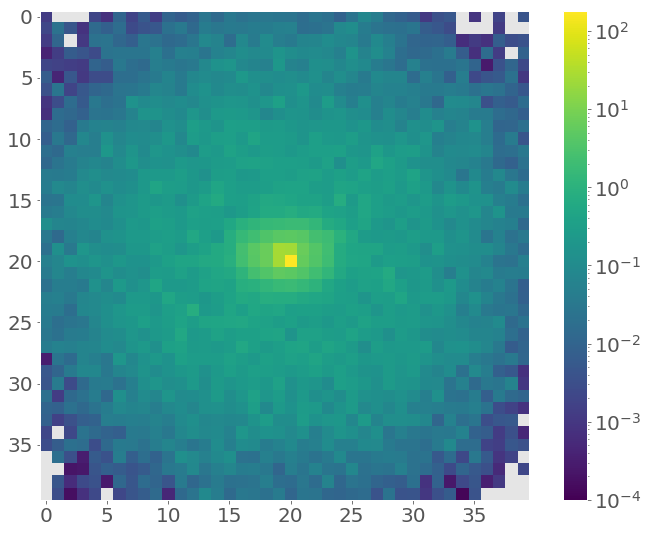

In [14]:
average_centered_jet, xedges, y_edges = \
    np.histogram2d(df[vector_names["ETA"]].values.reshape(-1), df[vector_names["PHI"]].values.reshape(-1),
        weights=df[vector_names["PT"]].values.reshape(-1) / len(df), bins=n_bins, range=plot_range,
    )
plot_jet_image(average_centered_jet)

Multiple options for further preprocessing. Here, we rotate to align the jets and later normalize the pixel values

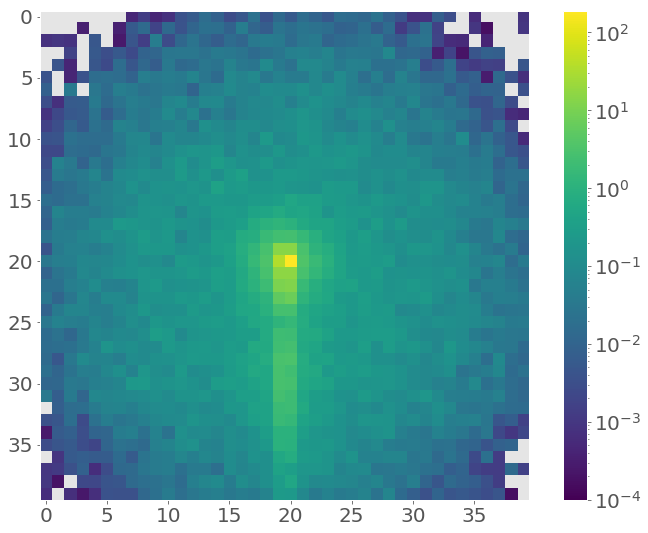

In [15]:
stacked_matrix = np.stack([df[vector_names["ETA"]], df[vector_names["PHI"]]], axis=1)

# find first maximum that does not lie exactly in the center
rotation_vectors = stacked_matrix[np.indices(stacked_matrix.shape[0:1]), :, np.min(np.argmax(stacked_matrix != 0, axis=-1), axis=-1)][0]
rotation_vectors /= np.linalg.norm(rotation_vectors, axis=-1)[:, None]

# rotate to align that maximum
rotation_matrix = np.stack([rotation_vectors, rotation_vectors.dot([[0, 1],[-1, 0]])], axis=-1)
rotated_matrix = np.einsum('ijl,ijk->ilk', rotation_matrix, stacked_matrix)

# plot rotated jets
average_rotated_jet, x_edges, y_edges = \
    np.histogram2d(rotated_matrix[:,0,:].reshape(-1), rotated_matrix[:,1,:].reshape(-1),
        weights=df[vector_names["PT"]].values.reshape(-1) / len(df), bins=n_bins, range=plot_range,
    )
plot_jet_image(average_rotated_jet)

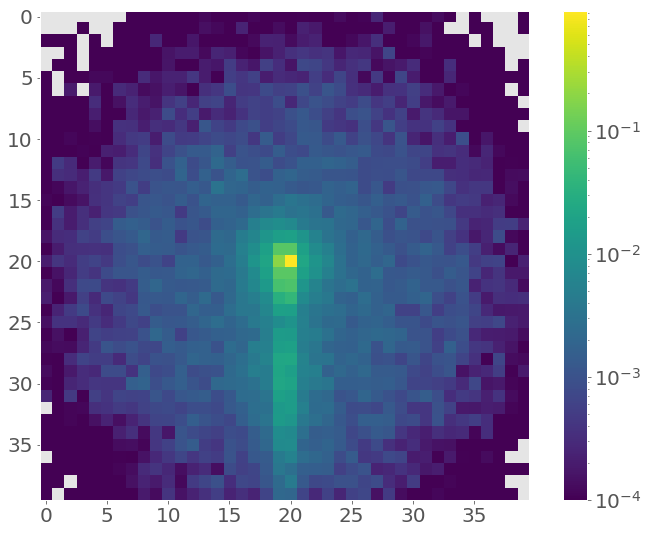

In [16]:
# create image data
weights = df[vector_names["PT"]].values
images = []
for i in range(len(df)):
    image, x_edges, y_edges = np.histogram2d(rotated_matrix[i, 0], rotated_matrix[i, 1],
        weights=weights[i], bins=n_bins, range=plot_range,
    )
    # scale to keep values between 0 and 1
    image /= np.max(image)
    images.append(image)
images = np.stack(images)

# plot data we use for training
average_image = np.sum(images, axis=0) / len(images)
plot_jet_image(average_image)

# Network Training

In [17]:
# add color channel dimension to data
data = np.expand_dims(images, axis=-1)
labels = df[label_key].values

activation = "relu"
padding = "same"

from tensorflow.keras import layers

Use keras to simplify network definition. Two options of writing the model:

### Functional

### Sequential

In [18]:

inputs = layers.Input(shape=(40, 40, 1))

# convolutional layers: n_filters, kernel size, **kwargs
x = layers.Conv2D(8, 4, activation=activation, padding=padding)(inputs)
x = layers.Conv2D(8, 4, activation=activation, padding=padding)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(8, 4, activation=activation, padding=padding)(x)
x = layers.Conv2D(8, 4, activation=activation, padding=padding)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation=activation)(x)
x = layers.Dense(64, activation=activation)(x)
x = layers.Dense(64, activation=activation)(x)
output = layers.Dense(2, activation="softmax")(x)

model = keras.models.Model(inputs, output)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])


In [19]:

model = keras.Sequential([
# convolutional layers: n_filters, kernel size, **kwargs
    layers.Conv2D(8, 4, activation=activation, padding=padding,
          input_shape=(40, 40, 1)),
    layers.Conv2D(8, 4, activation=activation, padding=padding),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(8, 4, activation=activation, padding=padding),
    layers.Conv2D(8, 4, activation=activation, padding=padding),
    layers.Flatten(),
    layers.Dense(64, activation=activation),
    layers.Dense(64, activation=activation),
    layers.Dense(64, activation=activation),
    layers.Dense(2, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

Sequential definition is slightly more simple, but functional definition allows access to intermediate layers of the model

Very helpful feature in Keras: Model summary

In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 40, 40, 8)         136       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 8)         1032      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 8)         1032      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 8)         1032      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                204864    
__________

Now we train the model, with early stopping if the loss on the validation set does not improve for 2 epochs

In [21]:
early_stopper = keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, mode="auto", restore_best_weights=True)
history = model.fit(data, labels, batch_size=50, epochs=10, shuffle=True, validation_split=0.3, callbacks=[early_stopper])

Train on 1400 samples, validate on 600 samples
Epoch 1/10
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.6057 - acc: 0.6793 - val_loss: 0.5114 - val_acc: 0.8450
Epoch 2/10
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.3725 - acc: 0.8600 - val_loss: 0.3956 - val_acc: 0.8400
Epoch 3/10
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.3145 - acc: 0.8821 - val_loss: 0.3469 - val_acc: 0.8583
Epoch 4/10
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.2981 - acc: 0.8893 - val_loss: 0.3408 - val_acc: 0.8600
Epoch 5/10
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.2759 - acc: 0.8957 - val_loss: 0.3359 - val_acc: 0.8617
Epoch 6/10
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.2596 - acc: 0.9050 - val_loss: 0.3546 - val_acc: 0.8667
Epoch 7/10
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.2577 - acc: 0.9050 - val_loss: 0.3574 - val_acc: 0.8600


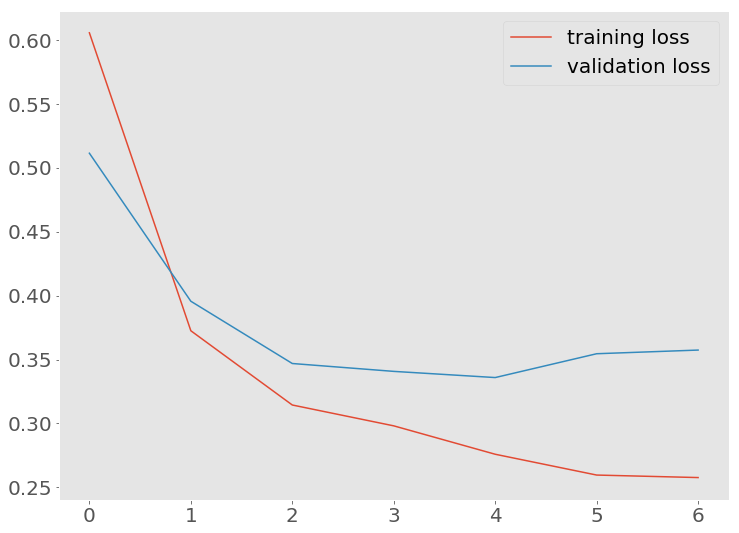

In [22]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

Target: Validation accuracy of 0.93 when trained on full dataset

A note on metrics (losss/accuracy/...) in Keras:

* Training metrics are accumulated during an epoch, with dropout applied (if used)

* Validation metrics are evaluated at the end of an epoch

$\quad \rightarrow$ E.g. training loss can be larger than validation loss

# Open Part

<br/>

### *Time for questions*

 <br/>

Otherwise: Explore top-tagging dataset
* Is the preprocessing helpful?
* Can the hyperparameters of the network be improved?
* How does the performance scale if we use more data?
* Other ideas to improve performance?


# Coffee

![](images/introduction/coffee.JPG)